In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('/content/Ashrae_cleaned.xls')  # Replace with your actual file path

# Data Preprocessing
# Encode categorical features
categorical_features = ['Season', 'Building type', 'Cooling startegy_building level', 'Climate',
                        'Koppen climate classification', 'Country', 'Thermal sensation']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode the target variable 'Thermal preference' into numerical categories
target_encoder = LabelEncoder()
data['Thermal preference'] = target_encoder.fit_transform(data['Thermal preference'])

# Separate features and target
X = data.drop(columns=['Thermal preference'])
y = data['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: The proto value '6' is already registered.

In [ ]:
### Lstm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('/content/Ashrae_cleaned.xls')

# Encode categorical features
categorical_features = ['Season', 'Building type', 'Cooling startegy_building level', 'Climate',
                        'Koppen climate classification', 'Country', 'Thermal sensation']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode the target variable 'Thermal preference' into numerical categories
target_encoder = LabelEncoder()
data['Thermal preference'] = target_encoder.fit_transform(data['Thermal preference'])

# Separate features and target
X = data.drop(columns=['Thermal preference'])
y = data['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1225/1225 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6316 - loss: 0.8420 - val_accuracy: 0.7401 - val_loss: 0.6400
Epoch 2/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7297 - loss: 0.6647 - val_accuracy: 0.7459 - val_loss: 0.6204
Epoch 3/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7354 - loss: 0.6477 - val_accuracy: 0.7499 - val_loss: 0.6121
Epoch 4/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7444 - loss: 0.6239 - val_accuracy: 0.7518 - val_loss: 0.6022
Epoch 5/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7438 - loss: 0.6234 - val_accuracy: 0.7564 - val_loss: 0.5968
Epoch 6/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7477 - loss: 0.6139 - val_accuracy: 0.7583 - val_loss: 0.5914
Epoch 7/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7504 - loss: 0.6102 - val_accuracy: 0.7616 - val_loss: 0.5882
Epoch 8/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7509 - loss: 0.6096 - val_accurac

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,115 (262.17 KB)

 Trainable params: 22,371 (87.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,744 (174.79 KB)

383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      6153
           1       0.76      0.79      0.78      4046
           2       0.77      0.60      0.68      2044

    accuracy                           0.77     12243
   macro avg       0.77      0.73      0.75     12243
weighted avg       0.77      0.77      0.76     12243



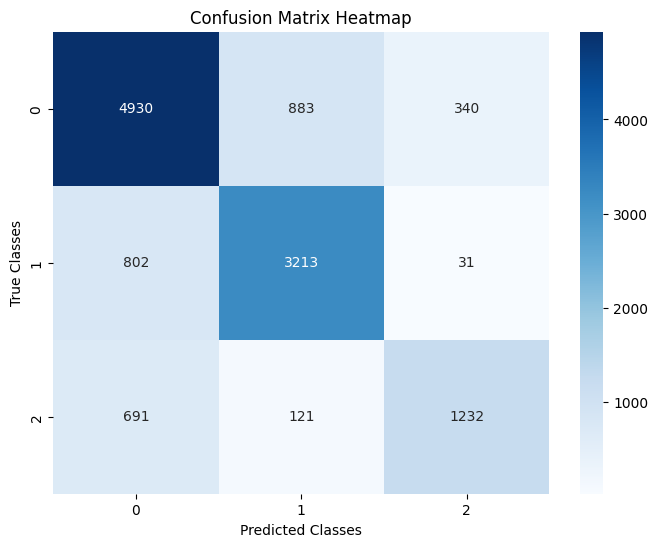

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_classes), yticklabels=np.unique(y_true_classes))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

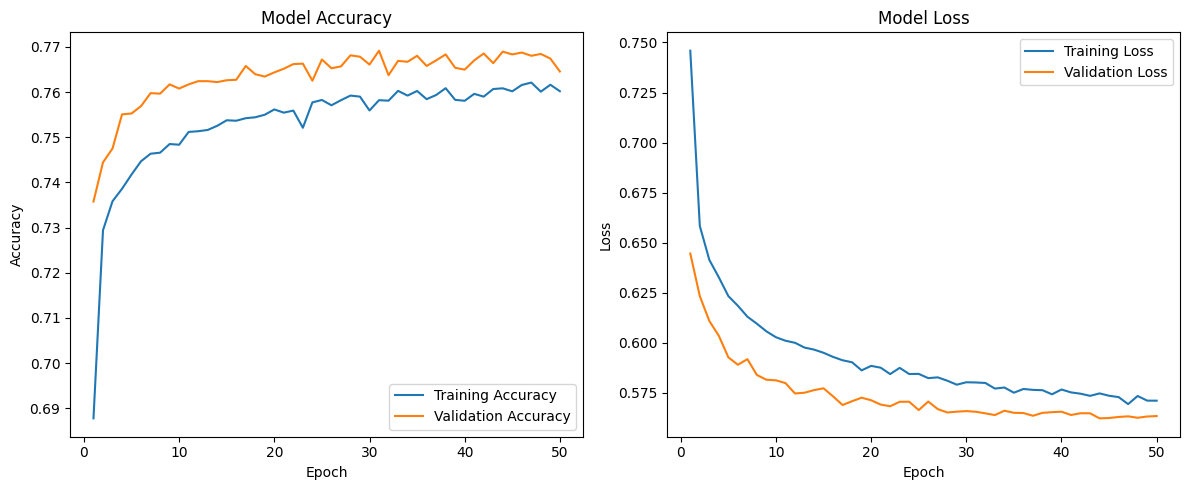

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


# normal model

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Function to display model summary with parameter counts
def model_summary_with_params(model):
    # Display the model architecture and parameters
    model.summary()

    # Visualize model architecture as an image (optional)
    plot_model(model, to_file="model_structure.png", show_shapes=True, show_layer_names=True)
    print("\nModel structure saved as model_structure.png")

# Load the trained model (assuming you have saved it as 'Enhanced_Pneumonia_Model.h5')
# model = tf.keras.models.load_model("Enhanced_Pneumonia_Model.h5")

# Call the function to display the model summary
model_summary_with_params(model)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,115 (262.17 KB)

 Trainable params: 22,371 (87.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,744 (174.79 KB)


Model structure saved as model_structure.png


In [ ]:
### rnn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('/content/Ashrae_cleaned.xls')

# Encode categorical features
categorical_features = ['Season', 'Building type', 'Cooling startegy_building level', 'Climate',
                        'Koppen climate classification', 'Country', 'Thermal sensation']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode the target variable 'Thermal preference' into numerical categories
target_encoder = LabelEncoder()
data['Thermal preference'] = target_encoder.fit_transform(data['Thermal preference'])

# Separate features and target
X = data.drop(columns=['Thermal preference'])
y = data['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN Model
model = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6276 - loss: 0.8487 - val_accuracy: 0.7380 - val_loss: 0.6531
Epoch 2/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7199 - loss: 0.6913 - val_accuracy: 0.7413 - val_loss: 0.6374
Epoch 3/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7288 - loss: 0.6661 - val_accuracy: 0.7458 - val_loss: 0.6215
Epoch 4/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7334 - loss: 0.6537 - val_accuracy: 0.7447 - val_loss: 0.6212
Epoch 5/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7337 - loss: 0.6433 - val_accuracy: 0.7481 - val_loss: 0.6107
Epoch 6/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7381 - loss: 0.6386 - val_accuracy: 0.7475 - val_loss: 0.6044
Epoch 7/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7350 - loss: 0.6389 - val_accuracy: 0.7511 - val_loss: 0.5995
Epoch 8/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7449 - loss: 0.6234 - val_accurac

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,763 (88.92 KB)

 Trainable params: 7,587 (29.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,176 (59.29 KB)

383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6153
           1       0.75      0.80      0.77      4046
           2       0.81      0.53      0.64      2044

    accuracy                           0.76     12243
   macro avg       0.77      0.71      0.73     12243
weighted avg       0.76      0.76      0.76     12243



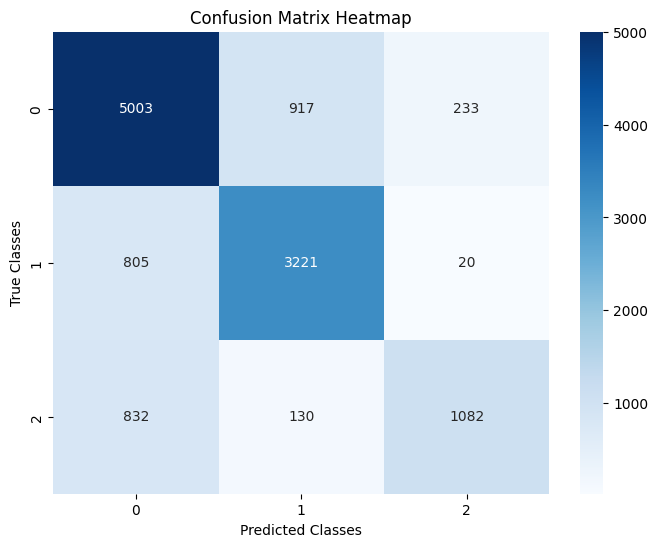

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_classes), yticklabels=np.unique(y_true_classes))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

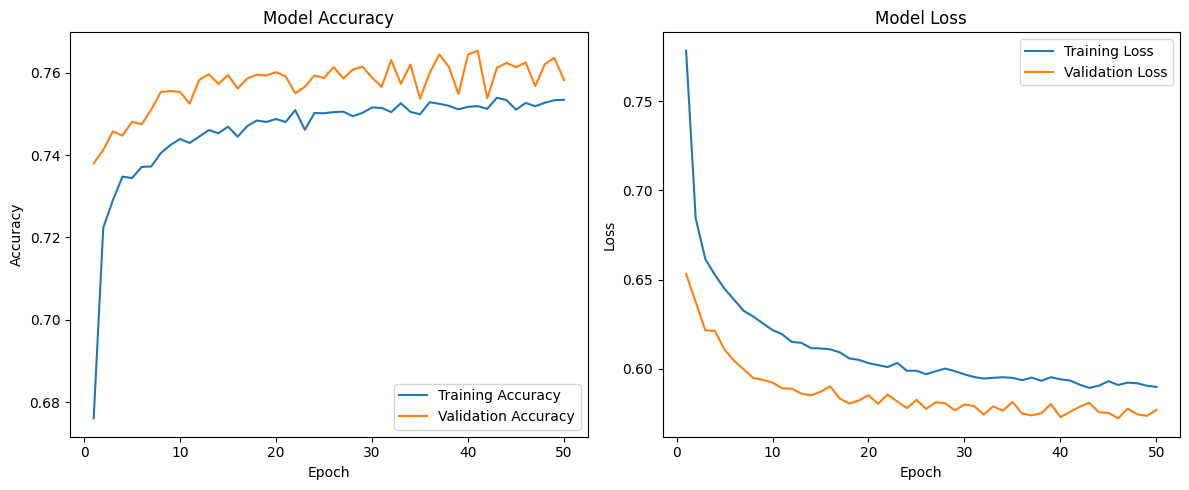

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


# normal model

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Function to display model summary with parameter counts
def model_summary_with_params(model):
    # Display the model architecture and parameters
    model.summary()

    # Visualize model architecture as an image (optional)
    plot_model(model, to_file="model_structure.png", show_shapes=True, show_layer_names=True)
    print("\nModel structure saved as model_structure.png")

# Load the trained model (assuming you have saved it as 'Enhanced_Pneumonia_Model.h5')
# model = tf.keras.models.load_model("Enhanced_Pneumonia_Model.h5")

# Call the function to display the model summary
model_summary_with_params(model)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,763 (88.92 KB)

 Trainable params: 7,587 (29.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,176 (59.29 KB)


Model structure saved as model_structure.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('/content/Ashrae_cleaned.xls')

# Encode categorical features
categorical_features = ['Season', 'Building type', 'Cooling startegy_building level', 'Climate',
                        'Koppen climate classification', 'Country', 'Thermal sensation']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode the target variable 'Thermal preference' into numerical categories
target_encoder = LabelEncoder()
data['Thermal preference'] = target_encoder.fit_transform(data['Thermal preference'])

# Separate features and target
X = data.drop(columns=['Thermal preference'])
y = data['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN Model
model = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('/content/final_Ashrae.xls')

# Split features and target
X = data.drop(columns=['Thermal preference'])
y = data['Thermal preference']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target variable
y_categorical = to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Model definition
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,491 (13.64 KB)

 Trainable params: 3,491 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/50
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6895 - loss: 0.7349 - val_accuracy: 0.7483 - val_loss: 0.6175
Epoch 2/50
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7472 - loss: 0.6029 - val_accuracy: 0.7553 - val_loss: 0.5965
Epoch 3/50
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7531 - loss: 0.5902 - val_accuracy: 0.7590 - val_loss: 0.5836
Epoch 4/50
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7565 - loss: 0.5851 - val_accuracy: 0.7536 - val_loss: 0.5849
Epoch 5/50
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7598 - loss: 0.5719 - val_accuracy: 0.7607 - val_loss: 0.5762
Epoch 6/50
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7601 - loss: 0.5694 - val_accuracy: 0.7618 - val_loss: 0.5742
Epoch 7/50
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7688 - loss: 0.5559 - val_accuracy: 0.7647 - val_loss: 0.5752
Epoch 8/50
2449/2449 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7627 - loss: 0.5637

In [ ]:
!pip install scikeras

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt

df = pd.read_csv('/content/data.csv')

# Load dataset (Assuming df is already loaded)
X = df.drop(columns=['Thermal preference'])
y = df['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with regularization and dropout
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=256, max_value=512, step=128),
                    input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 4)):  # Vary number of layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=128, max_value=256, step=64), activation='relu',
                        kernel_regularizer=l2(0.01)))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=y.shape[1], activation='softmax'))

    # Compile model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter tuning using Keras Tuner's Hyperband
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='hyperband_dir',
    project_name='thermal_preference'
)

# Start hyperparameter search
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = best_model.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Cross-validation (using scikeras KerasClassifier)
def create_keras_model():
    model = build_model(best_hps)  # Use best hyperparameters from tuner
    return model

keras_clf = KerasClassifier(model=create_keras_model, epochs=50, batch_size=10, verbose=0)

# 5-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(keras_clf, X, y, cv=kfold)
print(f"Cross-validation accuracy: {cv_results.mean():.4f} ± {cv_results.std():.4f}")

Trial 30 Complete [00h 00m 47s]
val_accuracy: 0.6561530232429504

Best val_accuracy So Far: 0.672182023525238
Total elapsed time: 00h 10m 05s
Epoch 1/75
242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6505 - loss: 0.7987 - val_accuracy: 0.6562 - val_loss: 0.7789
Epoch 2/75
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6486 - loss: 0.7897 - val_accuracy: 0.6629 - val_loss: 0.7764
Epoch 3/75
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6502 - loss: 0.7807 - val_accuracy: 0.6541 - val_loss: 0.7810
Epoch 4/75
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6506 - loss: 0.7881 - val_accuracy: 0.6520 - val_loss: 0.7767
Epoch 5/75
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6505 - loss: 0.7857 - val_accuracy: 0.6670 - val_loss: 0.7743
Epoch 6/75
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6587 - loss: 0.7877 - val_accuracy: 0.6649 - val_loss: 0.7731
Epoch 7/75
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6525 - loss: 0.7901 - v

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Cross-validation accuracy: 0.6619 ± 0.0176


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical

# Separate features and target
X = df.drop(columns=['Thermal preference'])
y = df['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Neural Network Model with LeakyReLU and increased alpha
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),  # Increased LeakyReLU activation with alpha=0.1
    Dropout(0.3),
    Dense(128),
    LeakyReLU(alpha=0.1),  # Increased LeakyReLU activation
    Dropout(0.3),
    Dense(64),
    LeakyReLU(alpha=0.1),  # Increased LeakyReLU activation
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),  # Increased LeakyReLU activation
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.5787 - loss: 0.8708 - val_accuracy: 0.6556 - val_loss: 0.7585
Epoch 2/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6332 - loss: 0.7906 - val_accuracy: 0.6489 - val_loss: 0.7450
Epoch 3/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6427 - loss: 0.7760 - val_accuracy: 0.6525 - val_loss: 0.7350
Epoch 4/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6500 - loss: 0.7546 - val_accuracy: 0.6567 - val_loss: 0.7349
Epoch 5/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6545 - loss: 0.7457 - val_accuracy: 0.6644 - val_loss: 0.7397
Epoch 6/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6467 - loss: 0.7397 - val_accuracy: 0.6711 - val_loss: 0.7291
Epoch 7/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6511 - loss: 0.7396 - val_accuracy: 0.6706 - val_loss: 0.7239
Epoch 8/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6621 - loss: 0.7286 - val_accuracy: 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12087 entries, 0 to 12086
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Season                           12087 non-null  int64  
 1   Building type                    12087 non-null  int64  
 2   Cooling startegy_building level  12087 non-null  int64  
 3   Climate                          12087 non-null  int64  
 4   Thermal sensation                12087 non-null  float64
 5   Koppen climate classification    12087 non-null  int64  
 6   Clo                              12087 non-null  float64
 7   Met                              12087 non-null  float64
 8   Thermal preference               12087 non-null  int64  
 9   Relative humidity                12087 non-null  float64
 10  Air velocity                     12087 non-null  float64
 11  Country                          12087 non-null  int64  
 12  Air 

<ipython-input-1-89b8178b09e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


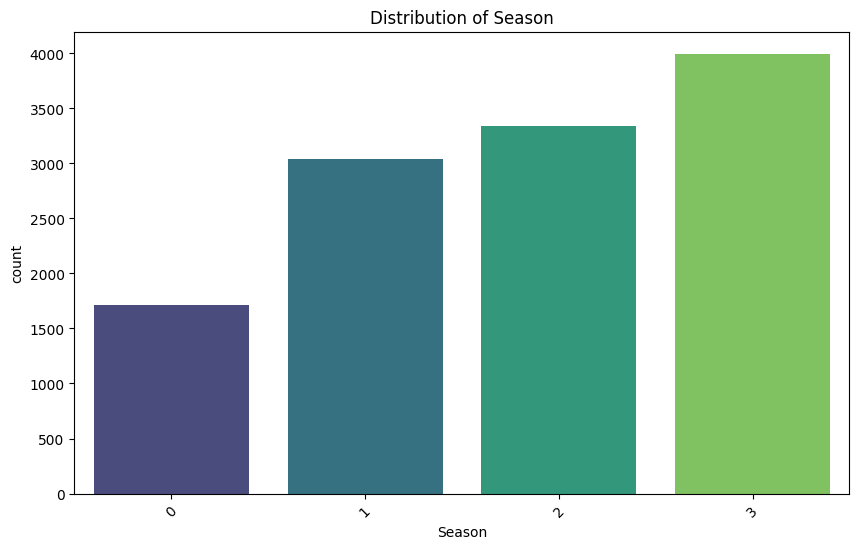

<ipython-input-1-89b8178b09e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


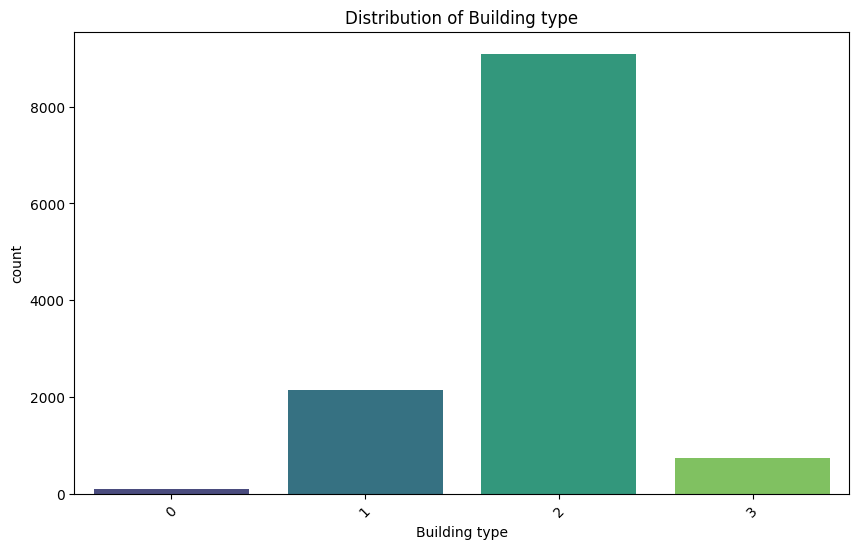

<ipython-input-1-89b8178b09e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


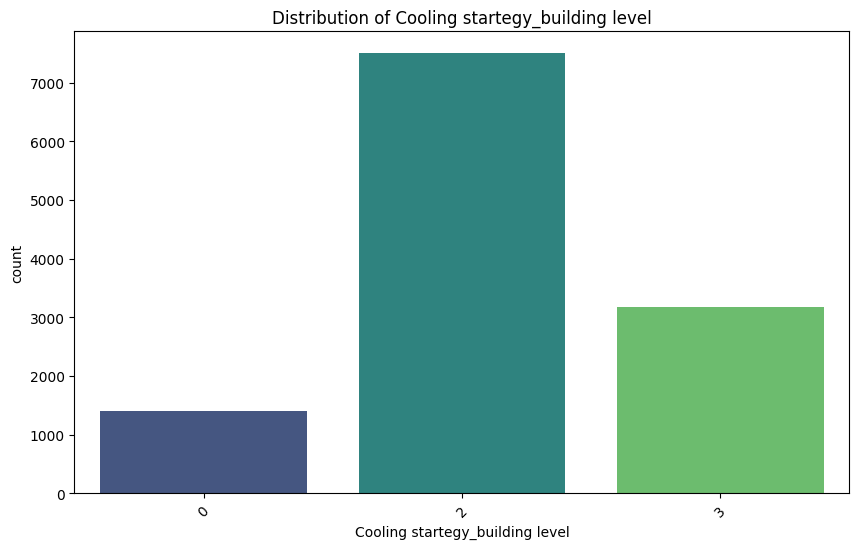

<ipython-input-1-89b8178b09e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


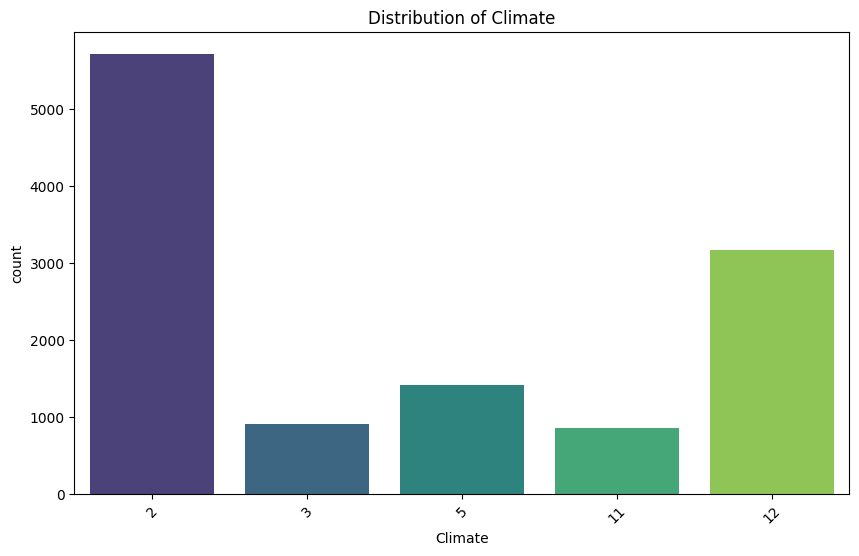

<ipython-input-1-89b8178b09e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


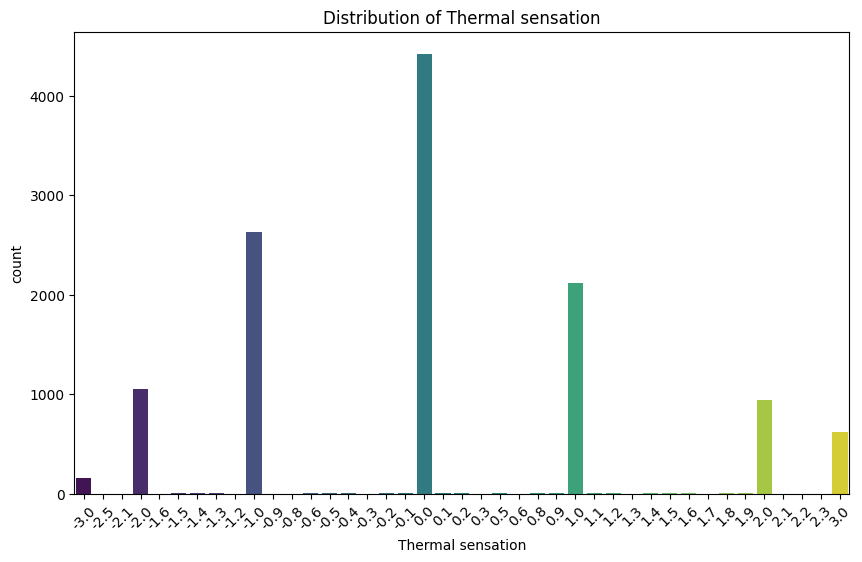

<ipython-input-1-89b8178b09e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


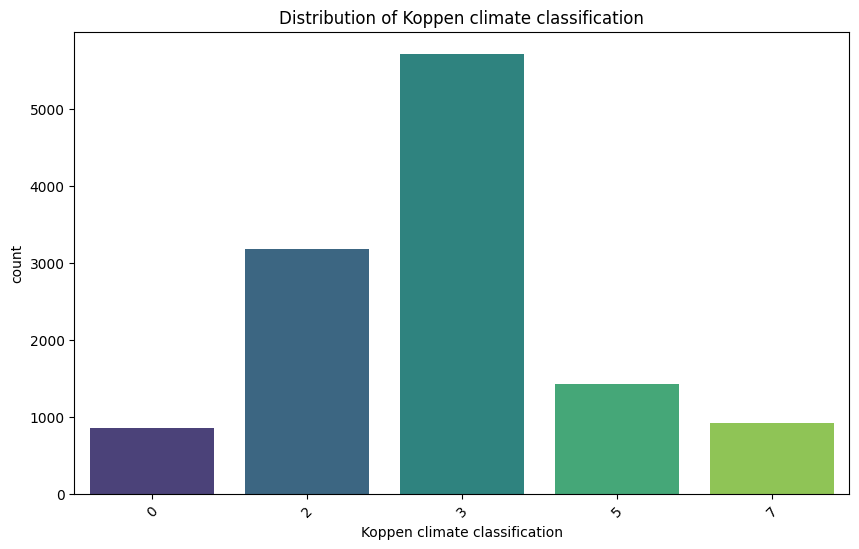

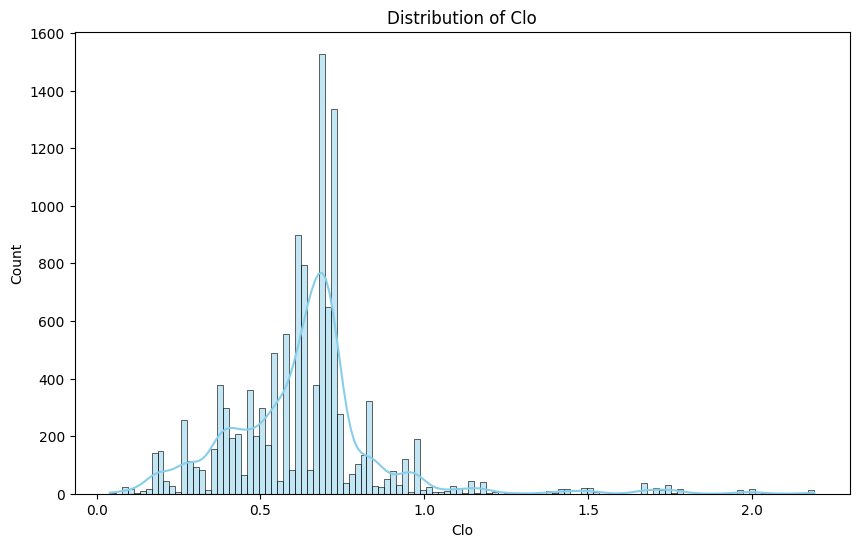

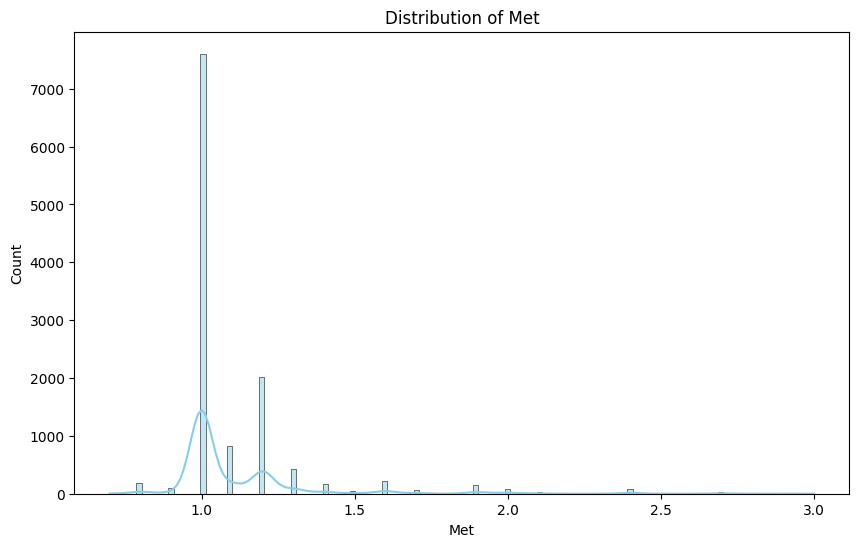

<ipython-input-1-89b8178b09e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


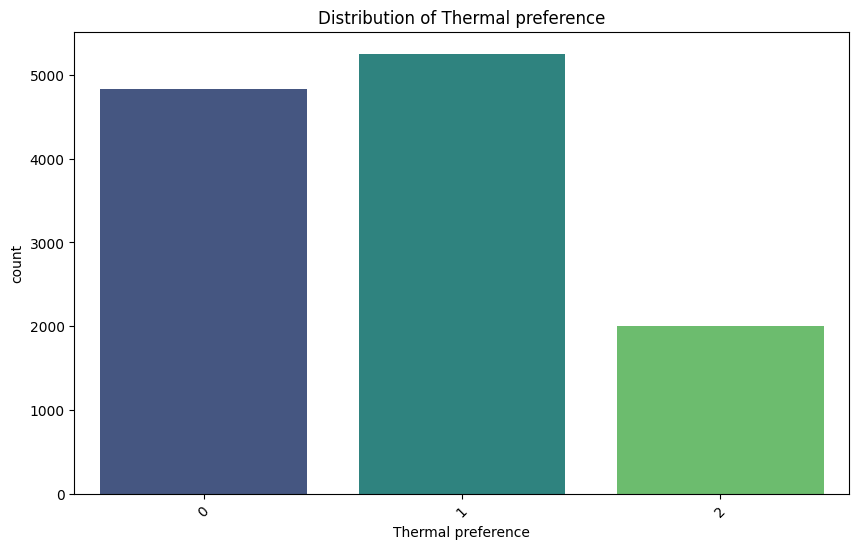

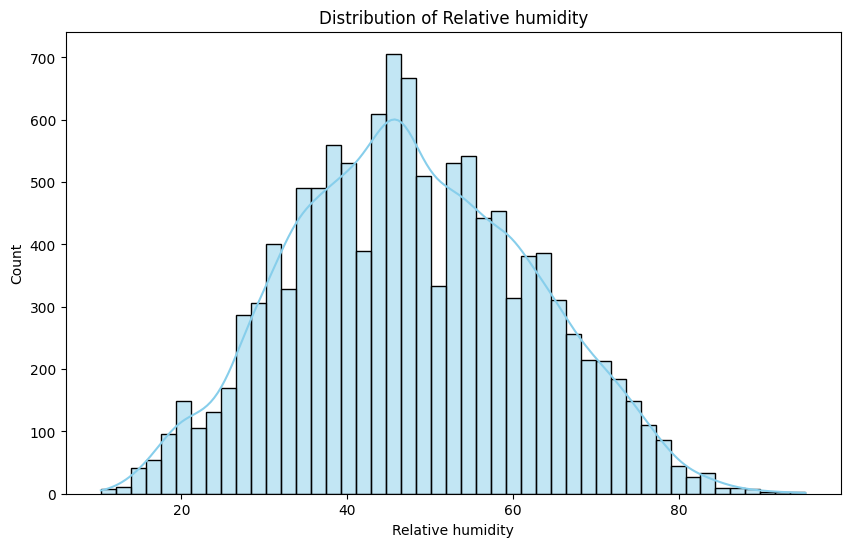

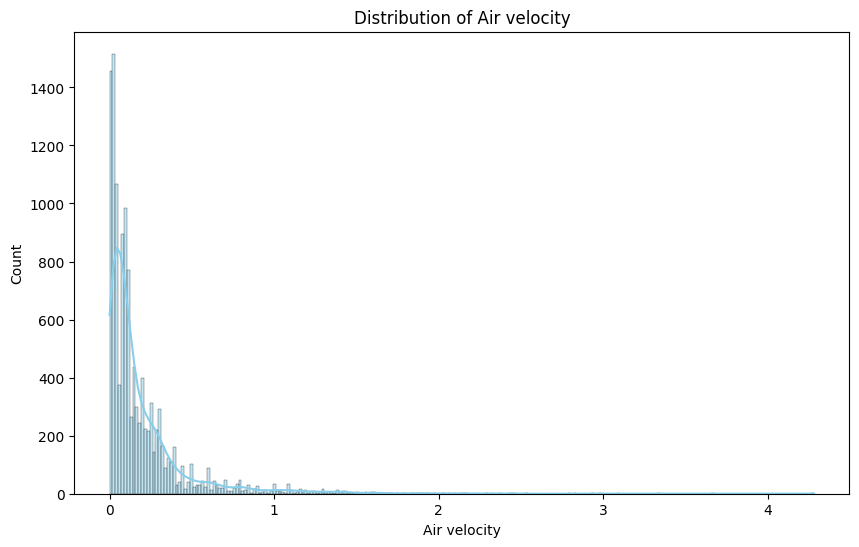

<ipython-input-1-89b8178b09e2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="viridis")


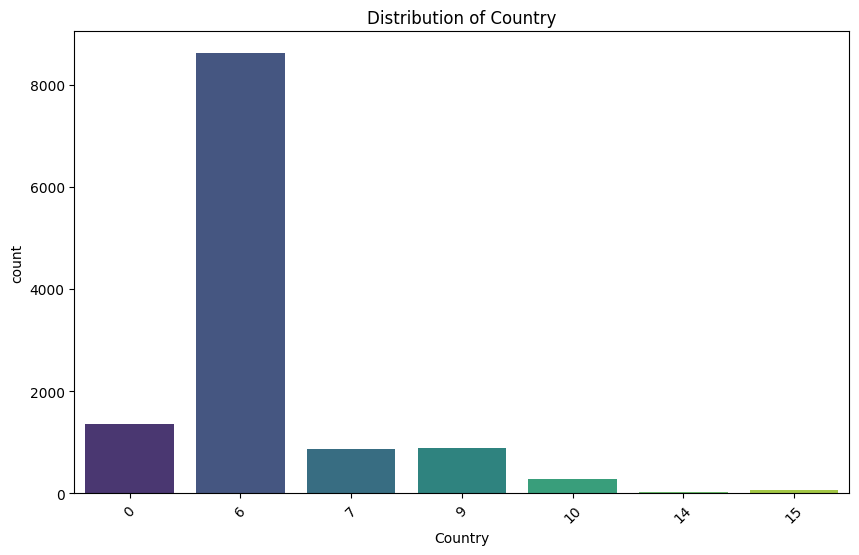

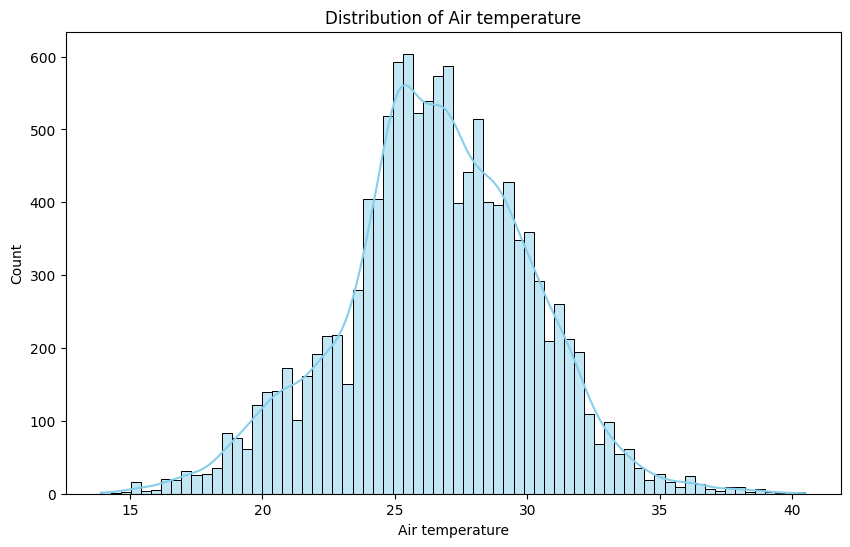


Summary Statistics for Numerical Columns:
             Season  Building type  Cooling startegy_building level  \
count  12087.000000   12087.000000                     12087.000000   
mean       1.796145       1.868040                         2.030446   
std        1.052239       0.503054                         0.853529   
min        0.000000       0.000000                         0.000000   
25%        1.000000       2.000000                         2.000000   
50%        2.000000       2.000000                         2.000000   
75%        3.000000       2.000000                         3.000000   
max        3.000000       3.000000                         3.000000   

            Climate  Thermal sensation  Koppen climate classification  \
count  12087.000000       12087.000000                   12087.000000   
mean       5.693803           0.058915                       3.064449   
std        4.415738           1.281975                       1.607137   
min        2.000000      

KeyError: 'season'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

# Define functions to plot distributions for different types of attributes
def plot_categorical_distribution(column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, palette="viridis")
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=45)
    plt.show()

def plot_numerical_distribution(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True, color="skyblue")
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.show()

# 1. Season (Categorical)
plot_categorical_distribution('Season')

# 2. Building Type (Categorical)
plot_categorical_distribution('Building type')

# 3. Cooling Strategy (Categorical)
plot_categorical_distribution('Cooling startegy_building level')

# 4. Climate (Categorical)
plot_categorical_distribution('Climate')

# 5. Thermal Sensation (Categorical or Numerical)
plot_categorical_distribution('Thermal sensation')

# 6. Koppen Climate Classification (Categorical)
plot_categorical_distribution('Koppen climate classification')

# 7. Clothing Insulation (Numerical)
plot_numerical_distribution('Clo')

# 8. Metabolic Rate (Numerical)
plot_numerical_distribution('Met')

# 9. Thermal Preference (Categorical)
plot_categorical_distribution('Thermal preference')

# 10. Relative Humidity (Numerical)
plot_numerical_distribution('Relative humidity')

# 11. Air Velocity (Numerical)
plot_numerical_distribution('Air velocity')

# 12. Country (Categorical)
plot_categorical_distribution('Country')

# 13. Air Temperature (Numerical)
plot_numerical_distribution('Air temperature')

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# For categorical columns, display unique values and counts
print("\nUnique Values and Counts for Categorical Columns:")
categorical_columns = ['season', 'building_type', 'cooling_strategy', 'climate',
                       'thermal_sensation', 'koppen_climate_classification', 'thermal_preference', 'country']
for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())


In [ ]:
df = pd.read_csv('/content/final_Ashrae.xls')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Separate features and target
X = df.drop(columns=['Thermal preference'])
y = df['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Deep Neural Network (DNN) Model
model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer with ReLU
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(256, activation='relu'),  # Hidden layer with ReLU
    Dropout(0.3),
    Dense(128, activation='relu'),  # Hidden layer with ReLU
    Dropout(0.3),
    Dense(64, activation='relu'),  # Hidden layer with ReLU
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer with ReLU
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6803 - loss: 0.7725 - val_accuracy: 0.7499 - val_loss: 0.6150
Epoch 2/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7397 - loss: 0.6404 - val_accuracy: 0.7536 - val_loss: 0.5990
Epoch 3/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7410 - loss: 0.6222 - val_accuracy: 0.7538 - val_loss: 0.5920
Epoch 4/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7522 - loss: 0.6064 - val_accuracy: 0.7598 - val_loss: 0.5857
Epoch 5/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7518 - loss: 0.5969 - val_accuracy: 0.7604 - val_loss: 0.5847
Epoch 6/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7546 - loss: 0.5940 - val_accuracy: 0.7557 - val_loss: 0.5820
Epoch 7/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7560 - loss: 0.5878 - val_accuracy: 0.7639 - val_loss: 0.5733
Epoch 8/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7539 - loss: 0.5912 -

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Function to display model summary with parameter counts
def model_summary_with_params(model):
    # Display the model architecture and parameters
    model.summary()

    # Visualize model architecture as an image (optional)
    plot_model(model, to_file="model_structure.png", show_shapes=True, show_layer_names=True)
    print("\nModel structure saved as model_structure.png")

# Load the trained model (assuming you have saved it as 'Enhanced_Pneumonia_Model.h5')
# model = tf.keras.models.load_model("Enhanced_Pneumonia_Model.h5")

# Call the function to display the model summary
model_summary_with_params(model)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 512)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 543,947 (2.07 MB)

 Trainable params: 181,315 (708.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 362,632 (1.38 MB)


Model structure saved as model_structure.png


383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      6153
           1       0.76      0.80      0.78      4046
           2       0.81      0.56      0.66      2044

    accuracy                           0.77     12243
   macro avg       0.78      0.73      0.74     12243
weighted avg       0.77      0.77      0.76     12243



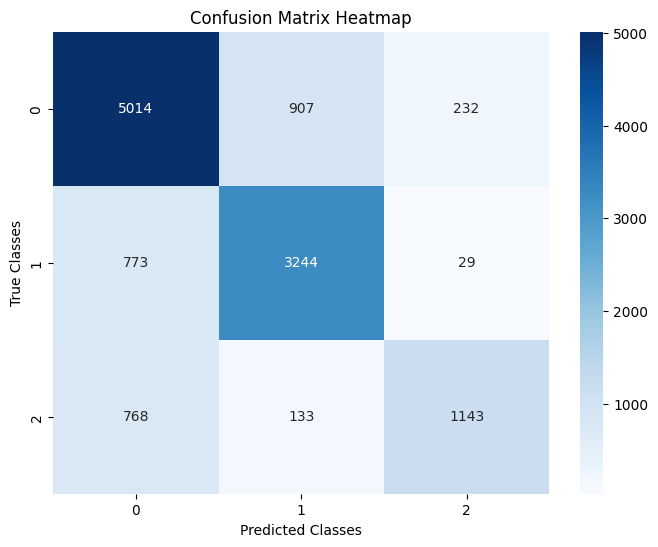

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_classes), yticklabels=np.unique(y_true_classes))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()